In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import keras
from keras.utils import np_utils

%matplotlib inline  
# matplotlib.style.use('ggplot')
data = pd.read_csv('student_data.csv')

Using TensorFlow backend.


In [2]:
data.head()

,admit,gre,gpa,rank
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


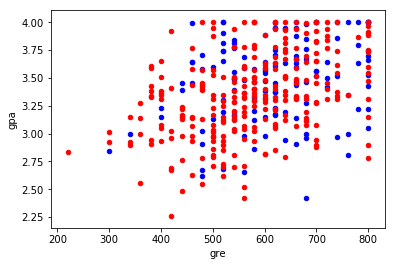

In [60]:
ax = data[data['admit'] == 1].plot.scatter(x='gre', y='gpa', c=['blue'])
data[data['admit'] == 0].plot.scatter(x='gre', y='gpa', c=['red'], ax=ax)

In [13]:
data_rank1 = data[data['rank'] == 1.0]
data_rank2 = data[data['rank'] == 2.0]
data_rank3 = data[data['rank'] == 3.0]
data_rank4 = data[data['rank'] == 4.0]

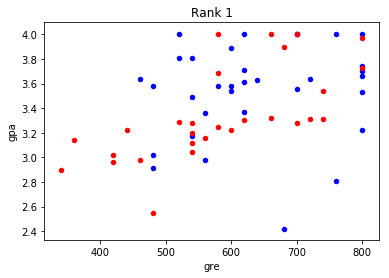

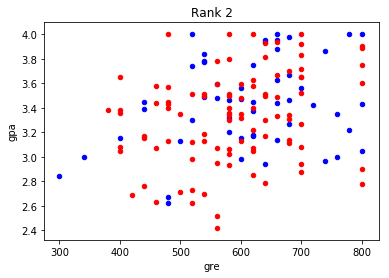

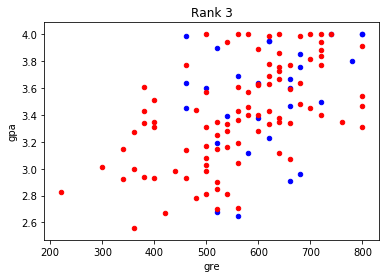

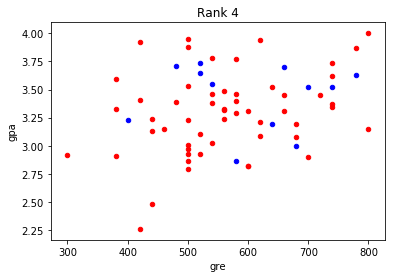

In [50]:
ax = data_rank1[data_rank1['admit'] == 1].plot.scatter(x='gre', y='gpa', c=['blue'])
data_rank1[data_rank1['admit'] == 0].plot.scatter(x='gre', y='gpa', c=['red'], ax=ax, title='Rank 1')

ax = data_rank2[data_rank2['admit'] == 1].plot.scatter(x='gre', y='gpa', c=['blue'])
data_rank2[data_rank2['admit'] == 0].plot.scatter(x='gre', y='gpa', c=['red'], ax=ax, title="Rank 2")

ax = data_rank3[data_rank3['admit'] == 1].plot.scatter(x='gre', y='gpa', c=['blue'])
data_rank3[data_rank3['admit'] == 0].plot.scatter(x='gre', y='gpa', c=['red'], ax=ax, title="Rank 3")

ax = data_rank4[data_rank4['admit'] == 1].plot.scatter(x='gre', y='gpa', c=['blue'])
data_rank4[data_rank4['admit'] == 0].plot.scatter(x='gre', y='gpa', c=['red'], ax=ax, title="Rank 4")

In [74]:
data["gre"] /= 800
data["gpa"] /= 4

In [75]:
data.head()

,admit,gre,gpa,rank
0,0,0.475,0.9025,3.0
1,1,0.825,0.9175,3.0
2,1,1.000,1.0000,1.0
3,1,0.800,0.7975,4.0
4,0,0.650,0.7325,4.0


In [125]:
data = pd.get_dummies(data, columns=['rank'])

In [126]:
data.head()

,admit,gre,gpa,rank_1.0,rank_2.0,rank_3.0,rank_4.0
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1


In [127]:
X = np.array(data)[:,1:]
y = np_utils.to_categorical(np.array(data["admit"]))
# X_train = X[:300]
# X_test = X[-100:]

In [138]:

# y_train = y[:300]
# y_test = y[-100:]


(X_train, X_test) = X[50:], X[:50]
(y_train, y_test) = y[50:], y[:50]


In [139]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

In [140]:
model = Sequential()
model.add(Dense(128, input_dim=6))
model.add(Activation('sigmoid'))
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               896       
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
activation_8 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 66        
_________________________________________________________________
activation_9 (Activation)    (None, 2)                 0         
Total params: 5,090.0
Trainable params: 5,090.0
Non-trainable params: 0.0
_________________________________________________________________


In [141]:
model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

In [142]:
score = model.evaluate(X_test, y_test)

32/50 [==================>...........] - ETA: 0s

In [143]:
score

[nan, 0.5599999976158142]

In [144]:
model.metrics_names

['loss', 'acc']